In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import shap


In [2]:
x, y = make_classification(n_samples=1000, n_classes=2, weights=[0.7, 0.3], n_features=10, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

**SHAP Values for Ensembles**

In [4]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
    
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x_test[:100])

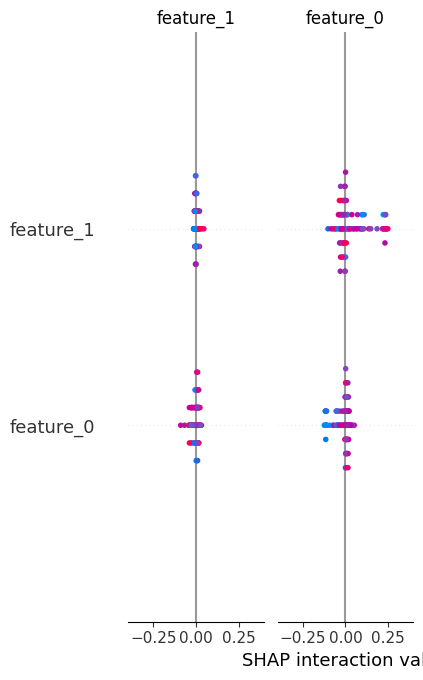

In [5]:
shap.summary_plot(shap_values, x_test[:100], feature_names=[f'feature_{i}' for i in range(x_train.shape[1])])

**Partial Dependence Plots**

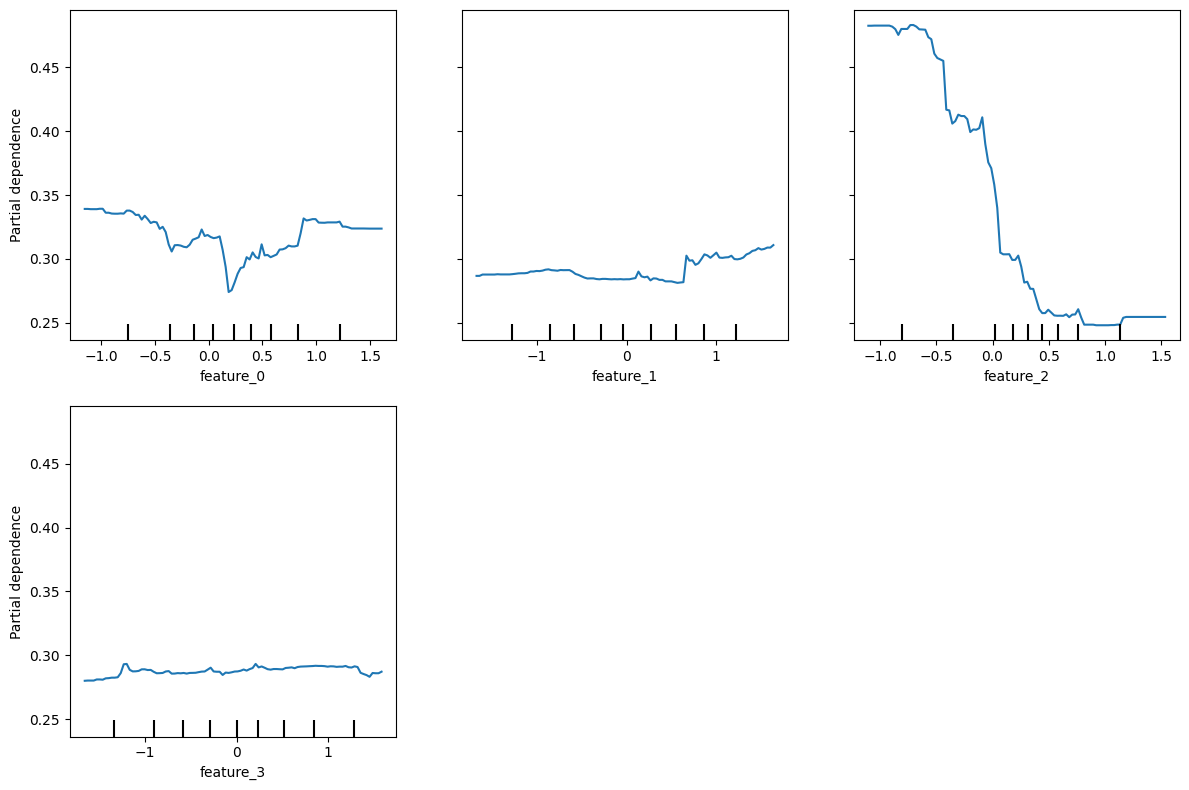

In [8]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Plot partial dependence
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(
    rf, x_train, feature_names=[f'feature_{i}' for i in range(x_train.shape[1])],
    features=[0, 1, 2, 3],  # Features to plot
    ax=ax
)
plt.tight_layout()
plt.show()